Notes: 
- https://frankfletcher.notion.site/CNN-Talk-11871b81f4ae8087a7a0c66f064ac285
- https://deeplizard.com/resource/pavq7noze2


Key Concepts I want you to pull from the lecture:
1. The concept of a NN "head" (Fully Connected Processing Layers) and "tail" (the input-specific processing layers)

2. The idea that a CNN just inserts an image (pre)processing section into a standard MLP.  The MLP is the head and the CNN blocks make up the tail.

3. The concept of having blocks of NN layers.  A standard convolutional block is made up of:
 - Convolutional Layer
 - Activation Layer (non-linear)
 - A Pooling Layer
 - An optional Batch Norm Layer

4. A Pooling Layer is a form of compression that shrinks a feature map to a smaller size by running a max or averaging window across the feature map

5. Batch Normalization is a kind of standardization that operates on the output of a layer
 - Whether to have batch norm be before or after the activation function is actually under some academic debate.  So be prepared to see it in both locations.
 - Aside from rescaling the data, BN has a regularizing effect, improves the efficiency of the model and can let you use higher learning rates.

6. The idea of non-linearity and the role of ReLU as an activation function. 

7. Output activation functions for categorization: Sigmoid and SoftMax  https://keras.io/api/layers/activations/#sigmoid-function and https://keras.io/api/layers/activations/#softmax-function 

8. Loss Functions for categorization: Binary Cross Entropy and Categorical Cross Entropyhttps://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class and  https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class

9. What features are and how they develop from simple edges to rounded edges to complex edges to something almost like images.

10. The most common error in neural network coding is shape mismatch. 

11. What the argmax() function does: It finds the index of the largest value in an array

12. Images are typically 3-dimensional data. It has a width a height and n number of channels. The channels generally represent the colors. Most processing assigns colors in RGB order, but sometimes it's in another order (BGR is standard with opencv)

In [1]:
# import libraries:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# loading an image

In [2]:
img = image.load_img('flower.jpg', target_size=(224,224)) # fit image into 
target_size=(224,224)

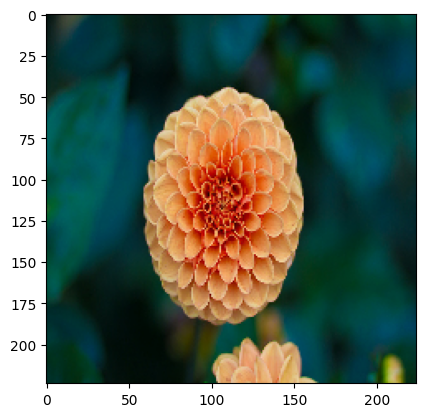

In [3]:
plt.imshow(img)

In [4]:
# convert image to array
img_array = image.img_to_array(img) 
img_array.shape

(224, 224, 3)

the max is 255 --> normalize

In [5]:
# normalize the image
img_array/255.0 

array([[[0.01176471, 0.07058824, 0.05098039],
        [0.02352941, 0.08235294, 0.05490196],
        [0.03137255, 0.09019608, 0.07843138],
        ...,
        [0.        , 0.31764707, 0.29411766],
        [0.        , 0.30588236, 0.25490198],
        [0.        , 0.29803923, 0.2509804 ]],

       [[0.02352941, 0.07450981, 0.04705882],
        [0.01960784, 0.08627451, 0.05490196],
        [0.02745098, 0.09019608, 0.07843138],
        ...,
        [0.        , 0.30980393, 0.28627452],
        [0.        , 0.29803923, 0.25882354],
        [0.00392157, 0.2901961 , 0.2627451 ]],

       [[0.03137255, 0.07843138, 0.0627451 ],
        [0.01960784, 0.08627451, 0.0627451 ],
        [0.02745098, 0.09019608, 0.07843138],
        ...,
        [0.        , 0.3019608 , 0.2784314 ],
        [0.00392157, 0.2901961 , 0.2627451 ],
        [0.00392157, 0.28235295, 0.25882354]],

       ...,

       [[0.00784314, 0.19215687, 0.16862746],
        [0.00784314, 0.19215687, 0.16078432],
        [0.        , 0

read image, load, convert to array, normalize, list or array

In [6]:
# loading the cifar10 dataset:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
# first image in the dataset
train_images[0] 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Display images

In [10]:
# getting the column names:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

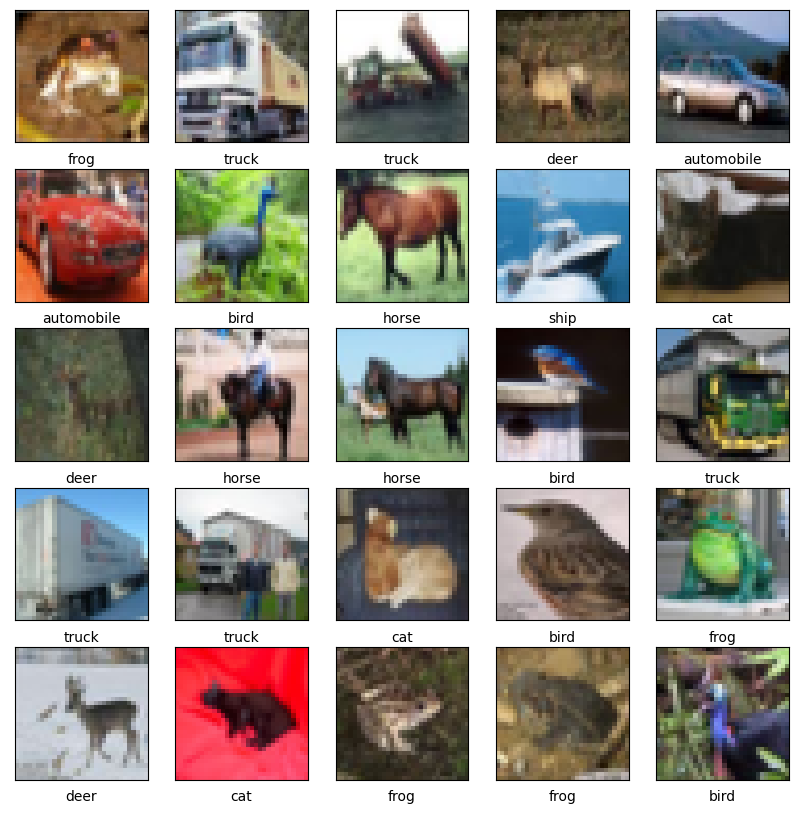

In [11]:
# plotting the first 25 images from the dataset:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [12]:
# Building the model:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) 

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compiling and training the model:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3596 - loss: 1.7345 - val_accuracy: 0.5675 - val_loss: 1.1965
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5934 - loss: 1.1468 - val_accuracy: 0.6360 - val_loss: 1.0425
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6593 - loss: 0.9700 - val_accuracy: 0.6439 - val_loss: 1.0035
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7009 - loss: 0.8485 - val_accuracy: 0.6929 - val_loss: 0.8848
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7262 - loss: 0.7816 - val_accuracy: 0.7023 - val_loss: 0.8525
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7505 - loss: 0.7054 - val_accuracy: 0.7079 - val_loss: 0.8496
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7724 - loss: 0.6466 - val_accuracy: 0.7066 - val_loss: 0.8637
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7902 - l

# Evaluation

313/313 - 1s - 3ms/step - accuracy: 0.6885 - loss: 1.3863


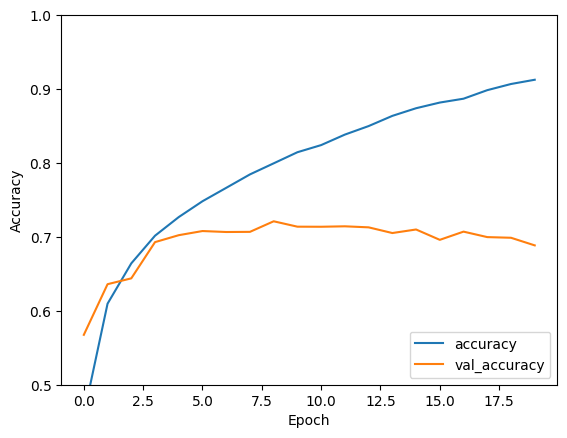

In [15]:
# Evaluating the model based on the test data: 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [16]:
# Predicting the test images:
pred= model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
pred.shape

(10000, 10)

In [18]:
# the predicted class of the first image:
np.argmax(pred[0]) 

3

In [19]:
# the actual class of the first image:
test_labels[0] 

array([3], dtype=uint8)

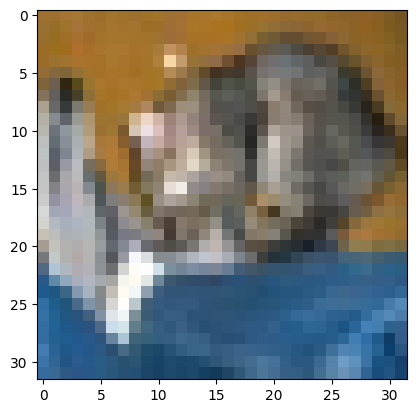

In [20]:
# displaying the first image:
plt.imshow(test_images[0]) 

In [21]:
# list of predicted classes:   
predicted_classes = [class_names[np.argmax(p)] for p in pred] 
print(predicted_classes)


['cat', 'ship', 'truck', 'airplane', 'frog', 'frog', 'cat', 'frog', 'cat', 'truck', 'deer', 'truck', 'ship', 'horse', 'truck', 'frog', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'deer', 'cat', 'deer', 'airplane', 'truck', 'frog', 'frog', 'dog', 'bird', 'cat', 'truck', 'truck', 'horse', 'truck', 'truck', 'dog', 'airplane', 'frog', 'dog', 'frog', 'ship', 'truck', 'bird', 'horse', 'horse', 'frog', 'truck', 'ship', 'frog', 'cat', 'ship', 'ship', 'horse', 'ship', 'dog', 'frog', 'horse', 'cat', 'frog', 'truck', 'bird', 'bird', 'automobile', 'bird', 'cat', 'horse', 'bird', 'frog', 'ship', 'ship', 'airplane', 'bird', 'horse', 'cat', 'cat', 'ship', 'ship', 'ship', 'automobile', 'horse', 'bird', 'horse', 'airplane', 'airplane', 'truck', 'truck', 'airplane', 'deer', 'ship', 'frog', 'deer', 'frog', 'deer', 'airplane', 'airplane', 'horse', 'deer', 'horse', 'cat', 'cat', 'automobile', 'automobile', 'cat', 'frog', 'ship', 'horse', 'deer', 'automobile', 'bird', 'bird', 'truc

In [32]:
# the predicted class of the 6th image:
class_names[np.argmax(pred[5])] 

'frog'

In [23]:
test_images[5] 

array([[[0.70196078, 0.4627451 , 0.3254902 ],
        [0.54509804, 0.37647059, 0.23921569],
        [0.30196078, 0.19215686, 0.10196078],
        ...,
        [0.34117647, 0.20784314, 0.18039216],
        [0.29803922, 0.18431373, 0.16078431],
        [0.30196078, 0.18431373, 0.16078431]],

       [[0.72156863, 0.50980392, 0.38039216],
        [0.52156863, 0.34509804, 0.20784314],
        [0.50196078, 0.34901961, 0.22745098],
        ...,
        [0.38431373, 0.23921569, 0.20784314],
        [0.35686275, 0.22745098, 0.2       ],
        [0.35294118, 0.22352941, 0.19215686]],

       [[0.70588235, 0.51764706, 0.39215686],
        [0.59607843, 0.40784314, 0.27843137],
        [0.69019608, 0.50588235, 0.36078431],
        ...,
        [0.39607843, 0.24313725, 0.20784314],
        [0.36470588, 0.21960784, 0.18431373],
        [0.37254902, 0.22352941, 0.19215686]],

       ...,

       [[0.55686275, 0.28627451, 0.23921569],
        [0.58431373, 0.32941176, 0.29411765],
        [0.56470588, 0

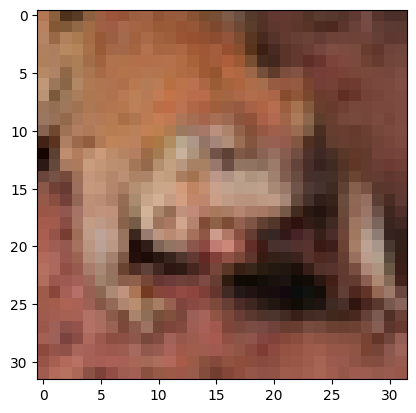

In [24]:
# displaying the 6th image:
plt.imshow(test_images[5]) 

In [25]:
test_imag = test_images[5] 

In [26]:
test_imag.shape

(32, 32, 3)

In [27]:
# adding a dimension to the image:
np.expand_dims(test_imag, axis=0).shape 

(1, 32, 32, 3)

In [28]:
# adding a dimension to the image:
test_imag_final = np.expand_dims(test_imag, axis=0) 
test_imag_final.shape

(1, 32, 32, 3)

In [29]:
# the predicted class of the 6th image:
np.argmax(model.predict(test_imag_final)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


6

In [30]:
# the predicted class of the 6th image:
predicted_label = class_names[np.argmax(model.predict(test_imag_final))] 
print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
frog
